### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

    * Retrieve the information of the dataset to identify the columns it contains and their corresponding data types.
    * Identify the columns that have missing values.
    * Check for the duplicated records

In [6]:
# check for missing/null values in the dataset
data.isna().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
Y                           0
maritalStatus               0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
occupation                  0
has_children                0
education                   0
direction_opp               0
income                      0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
destination                 0
dtype: int64

In [7]:
# check for duplicate records
data.duplicated().sum()

74

3. Decide what to do about your missing data -- drop, replace, other...

    * Remove duplicate records
    * Check for the missing values after removing the duplicates and take action to drop, replace etc
    * Drop records with missing data minimum records
    * Replace missing values with 'unknown' where the missing values are exceptionally high

In [8]:
# remove duplicate records
data.drop_duplicates(inplace=True)

In [9]:
# Check for missing values after removing duplicate records
data.isna().sum().sort_values(ascending=False)

car                     12502
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 150
RestaurantLessThan20      129
Bar                       107
Y                           0
maritalStatus               0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
occupation                  0
has_children                0
education                   0
direction_opp               0
income                      0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
destination                 0
dtype: int64

In [10]:
# drop records with missing data for Bar, RestaurantLessThan20, CarryAway, Restaurant20To50, CoffeeHouse
data_new = data.dropna(subset=['Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse'])

In [11]:
# replace missing values for others (car) as unknown 
data_new.fillna('unknown', inplace=True)

In [12]:
data_new.shape

(12007, 26)

In [13]:
# convert and store age as int in new colum
def convert_age_to_int(df):
    # define a mapping for 'below21' and '50plus' values
    age_mapping = {
        'below21': 20,
        '50plus': 50
    }
    df['age_int'] = pd.to_numeric(df['age'], errors='coerce')
    df['age_int'].fillna(df['age'].map(age_mapping), inplace=True)
    return df

data_new = convert_age_to_int(data_new)
data_new.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_int
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,21.0
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,21.0


4. What proportion of the total observations chose to accept the coupon? 



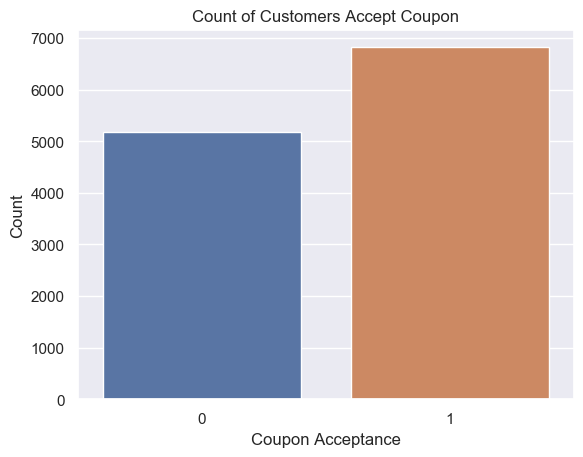

In [14]:
#counplot of customers that accept the coupon
sns.set(style="darkgrid")
sns.countplot(data=data_new, x='Y')
plt.xlabel("Coupon Acceptance")
plt.ylabel("Count")
plt.title("Count of Customers Accept Coupon")
plt.show()

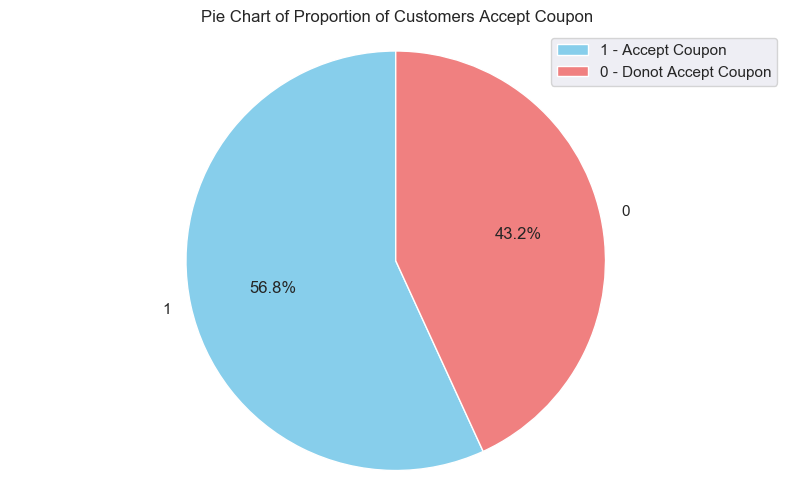

In [15]:
# pie chat showing the propotion of the customers that accept the coupon
coupon_counts = data_new['Y'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(coupon_counts, labels=coupon_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])

descriptions = {1: 'Accept Coupon', 0: 'Donot Accept Coupon'}
legend_labels = [f'{label} - {descriptions[label]}' for label in coupon_counts.index]
plt.legend(legend_labels, loc='left')

plt.title("Pie Chart of Proportion of Customers Accept Coupon")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

5. Use a bar plot to visualize the `coupon` column.

In [16]:
# check count of coupons
data_new['coupon'].value_counts()

Coffee House             3809
Restaurant(<20)          2646
Carry out & Take away    2233
Bar                      1906
Restaurant(20-50)        1413
Name: coupon, dtype: int64

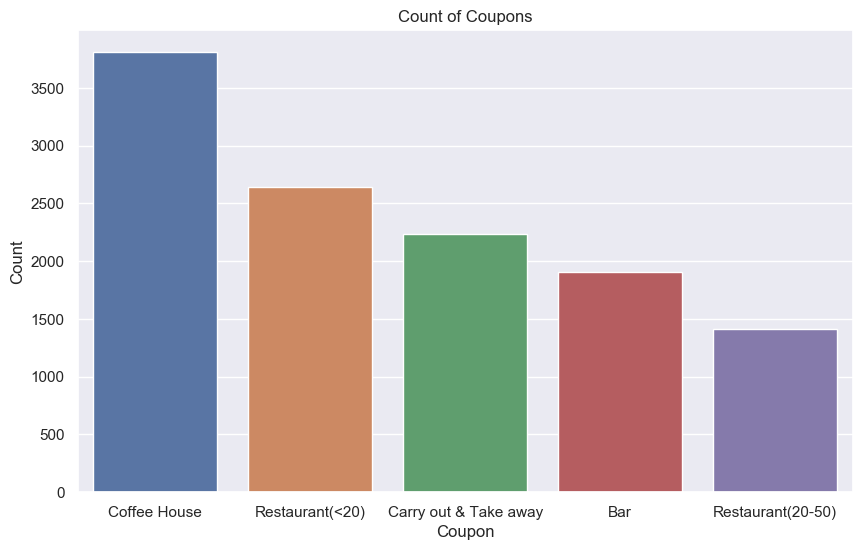

In [17]:
# dispaly barplot of coupon and its count
fig = plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(data=data_new, x='coupon', order=data_new['coupon'].value_counts().index)
#sns.barplot(data=data_new, x='coupon', y=data_new['coupon'].index)
plt.xlabel("Coupon")
plt.ylabel("Count")
plt.title("Count of Coupons")
plt.show()

6. Use a histogram to visualize the temperature column.

In [18]:
data_new['temperature'].value_counts()

80    6171
55    3652
30    2184
Name: temperature, dtype: int64

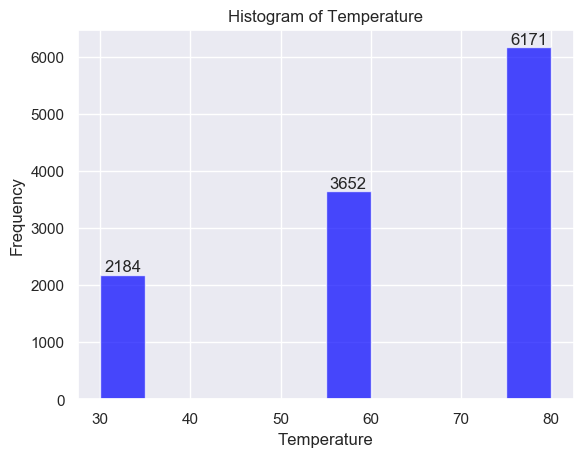

In [19]:
# Create a histogram for temperature column
plt.hist(data_new['temperature'], bins=10, color='blue', alpha=0.7)

# adding annotations to the plot
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')

# Add labels and title to the plot
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
data_bar = data_new[data_new['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


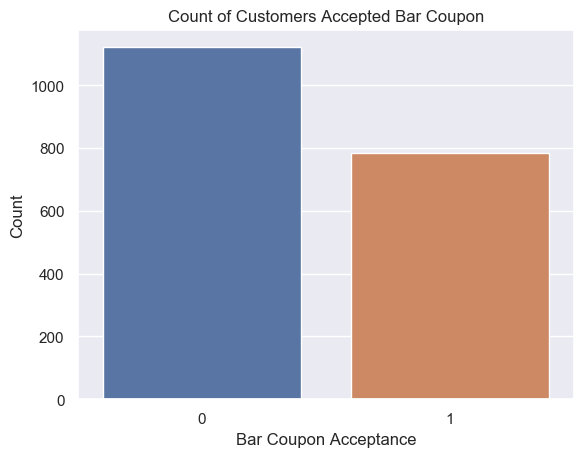

In [21]:
#counplot of customers that accepted bar coupon
sns.set(style="darkgrid")
sns.countplot(data=data_bar, x='Y')
plt.xlabel("Bar Coupon Acceptance")
plt.ylabel("Count")
plt.title("Count of Customers Accepted Bar Coupon")
plt.show()

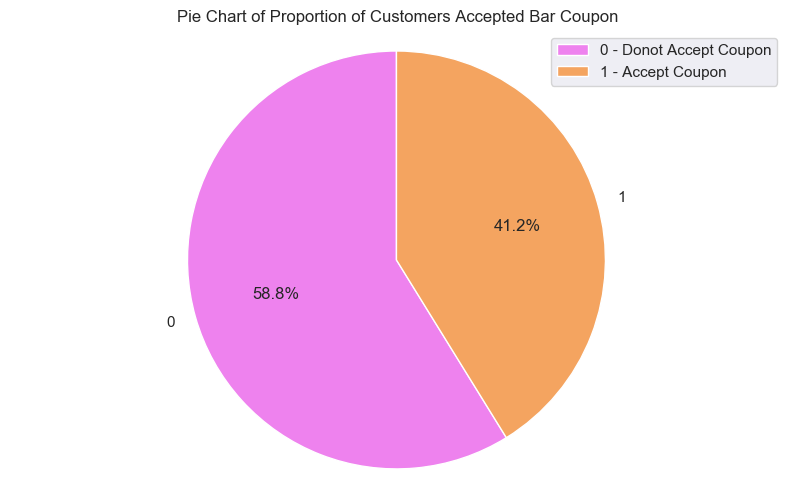

In [22]:
# pie chat showing the propotion of the customers that accepted the bar coupon
bar_coupon_counts = data_bar['Y'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(bar_coupon_counts, labels=bar_coupon_counts.index, autopct='%1.1f%%', startangle=90, colors=['violet', 'sandybrown'])

descriptions = {1: 'Accept Coupon', 0: 'Donot Accept Coupon'}
legend_labels = [f'{label} - {descriptions[label]}' for label in bar_coupon_counts.index]
plt.legend(legend_labels, loc='left')

plt.title("Pie Chart of Proportion of Customers Accepted Bar Coupon")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
data_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [24]:
data_bar['Bar'].value_counts()

never    788
less1    546
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [25]:
less_than_equal_3 = data_bar[data_bar['Bar'].isin(['never', 'less1', '1~3'])]
greater_than_3 = data_bar[data_bar['Bar'].isin(['gt8', '4~8'])]

acceptance_rate_less_than_equal_3  = less_than_equal_3[less_than_equal_3['Y'] == 1].shape[0] / less_than_equal_3.shape[0]
acceptance_rate_more_than_3 = greater_than_3[greater_than_3['Y'] == 1].shape[0] / greater_than_3.shape[0]

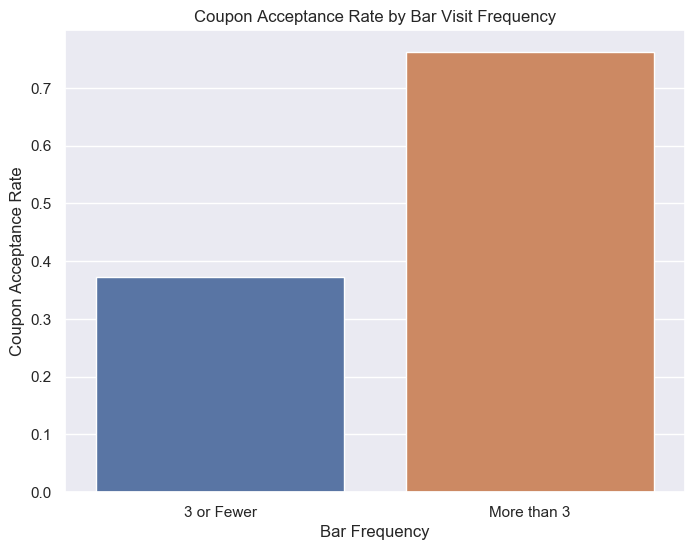

In [26]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=['3 or Fewer', 'More than 3'], y=[acceptance_rate_less_than_equal_3, acceptance_rate_more_than_3])
plt.xlabel("Bar Frequency")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance Rate by Bar Visit Frequency")

# Show the plot
plt.show()

###### Creating a pie chart to visualize the acceptance rate between those who went to a bar 3 or fewer times a month and those who went more frequently.

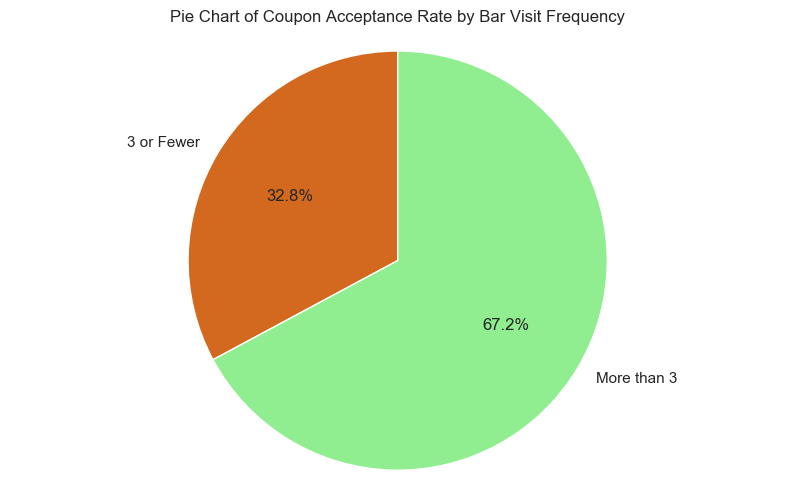

In [27]:
# pie chat showing the acceptance rate between those who went to a bar 3 or fewer times a month and those who went more frequently.
bar_coupon_acceptance_rate = [acceptance_rate_less_than_equal_3, acceptance_rate_more_than_3]
label_acceptance_rate = ['3 or Fewer', 'More than 3']

plt.figure(figsize=(10, 6))
plt.pie(bar_coupon_acceptance_rate, labels=label_acceptance_rate, autopct='%1.1f%%', startangle=90, colors=['chocolate', 'lightgreen'])

plt.title("Pie Chart of Coupon Acceptance Rate by Bar Visit Frequency")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [28]:
data_bar.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_int
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,21.0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,21.0
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,1,1,0,1,1,21.0
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,0,46.0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,1,0,0,46.0


In [29]:
# get acceptance rate between drivers who go to bar more than once a month and are over the age of 25 to the all others.
bar_more_than_once_over_age_25  = data_bar.query("age_int > 25 and Bar in(['1~3', 'gt8', '4~8'])")
bar_others = data_bar.drop(bar_more_than_once_over_age_25.index)

acceptance_rate_more_than_once_over_age_25 = bar_more_than_once_over_age_25['Y'].mean()
acceptance_rate_others = bar_others['Y'].mean()

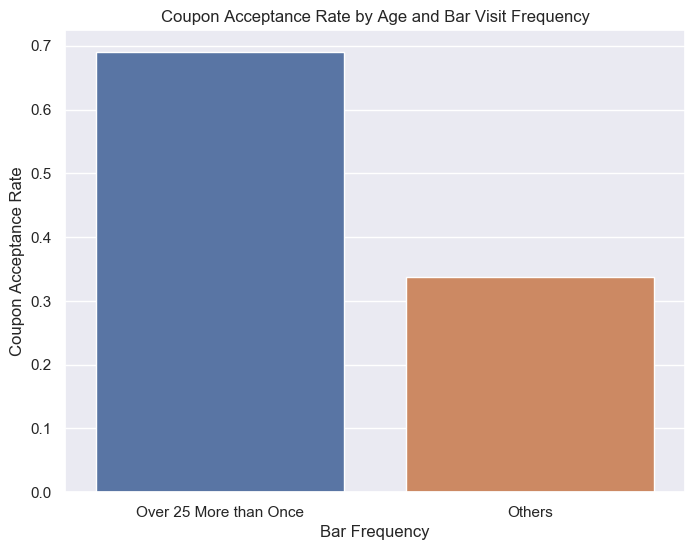

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=['Over 25 More than Once', 'Others'], y=[acceptance_rate_more_than_once_over_age_25, acceptance_rate_others])
plt.xlabel("Bar Frequency")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance Rate by Age and Bar Visit Frequency")

# Show the plot
plt.show()

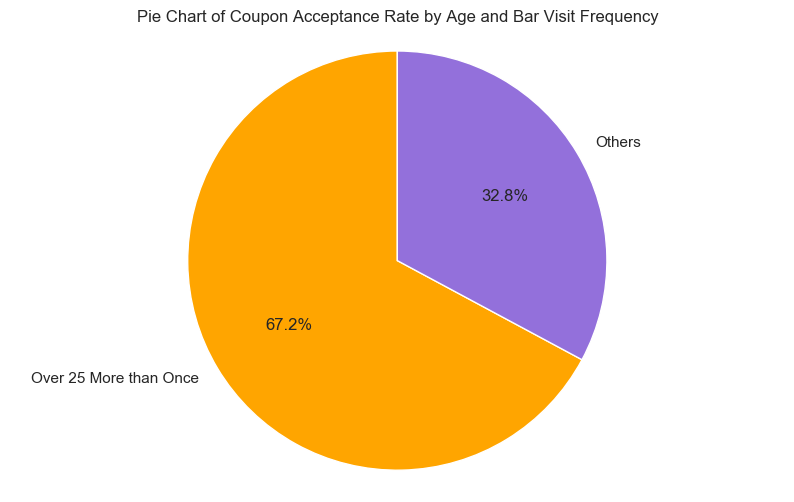

In [31]:
# pie chat showing the acceptance rate between between drivers who go to a bar more than once a month and are over the age of 25 to the all others.
acceptance_rate_by_age_visit = [acceptance_rate_more_than_once_over_age_25, acceptance_rate_others]
label_acceptance_rate_by_age_visit = ['Over 25 More than Once', 'Others']

plt.figure(figsize=(10, 6))
plt.pie(acceptance_rate_by_age_visit, labels=label_acceptance_rate_by_age_visit, autopct='%1.1f%%', startangle=90, colors=['orange', 'mediumpurple'])

plt.title("Pie Chart of Coupon Acceptance Rate by Age and Bar Visit Frequency")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [32]:
# A group of drivers who go to a bar once a month, drivers who have passengers with no kids, drivers who are not in farming.
bar_more_than_once  = data_bar.query("Bar in(['1~3', 'gt8', '4~8'])")
bar_with_passengers = data_bar.query("passanger in('Friend(s)', 'Partner')")
bar_with_occupation = data_bar.query("occupation not in ('Farming Fishing & Forestry')")

# Calculate the acceptance rate for each group
acceptance_rate_bar_more_than_once = bar_more_than_once['Y'].mean()
acceptance_rate_bar_with_passengers = bar_with_passengers['Y'].mean()
acceptance_rate_bar_with_occupation = bar_with_occupation['Y'].mean()

group_names = ['acceptance_rate_bar_more_than_once', 'acceptance_rate_bar_with_passengers', 'acceptance_rate_bar_with_occupation']
labels = ['Visit Bar more than once a Month', 'Passengers with No Kid', 'Occupation No Farming']

# Create a DataFrame with the acceptance rates and group names
group_data = pd.DataFrame({'Group': group_names,
                     'Acceptance Rate': [acceptance_rate_bar_more_than_once, acceptance_rate_bar_with_passengers, acceptance_rate_bar_with_occupation]})

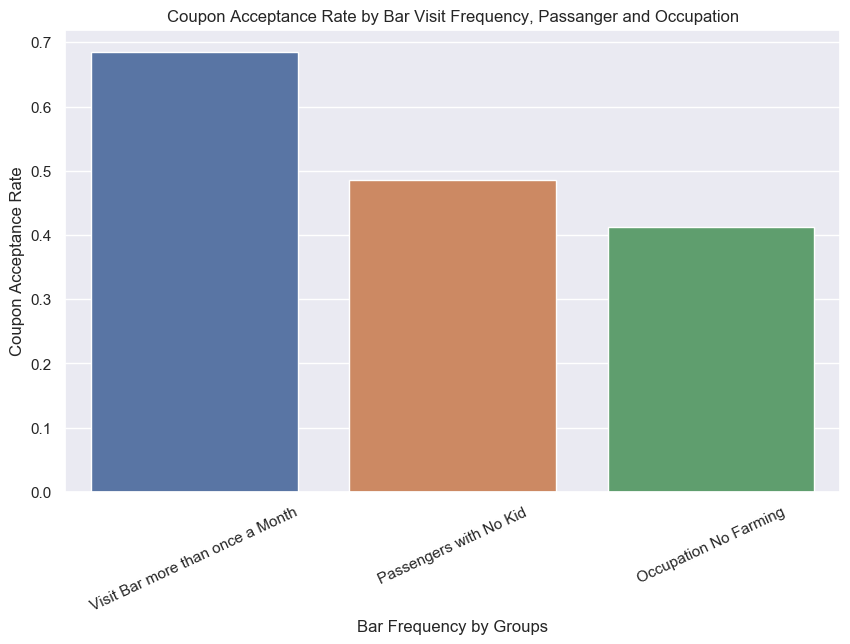

In [33]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=group_data, x='Group', y='Acceptance Rate', order=group_names)
plt.xlabel("Bar Frequency by Groups")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance Rate by Bar Visit Frequency, Passanger and Occupation")
plt.xticks(range(len(group_names)), labels, rotation=25)

# Show the plot
plt.show()

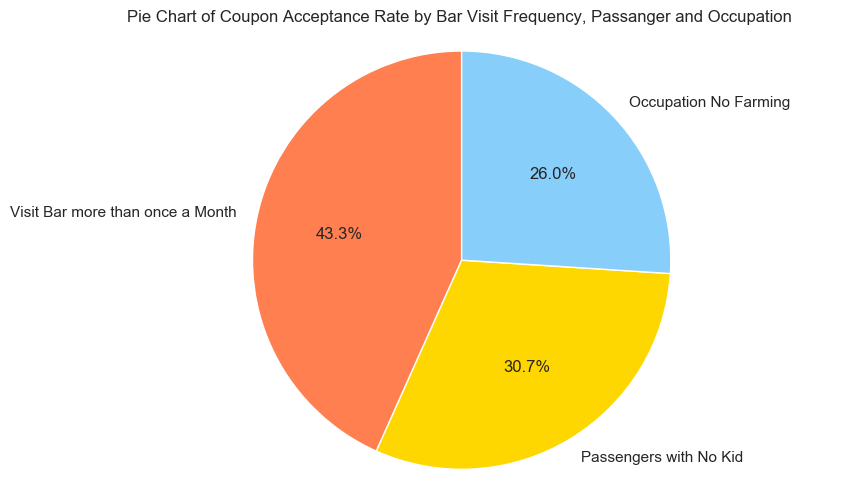

In [34]:
# pie chat showing the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
acceptance_rate_by_groups = [acceptance_rate_bar_more_than_once, acceptance_rate_bar_with_passengers, acceptance_rate_bar_with_occupation]
label_acceptance_rate_by_groups = ['Visit Bar more than once a Month', 'Passengers with No Kid', 'Occupation No Farming']

plt.figure(figsize=(10, 6))
plt.pie(acceptance_rate_by_groups, labels=label_acceptance_rate_by_groups, autopct='%1.1f%%', startangle=90, colors=['coral', 'gold', 'lightskyblue'])

plt.title("Pie Chart of Coupon Acceptance Rate by Bar Visit Frequency, Passanger and Occupation")
plt.axis('equal')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [35]:
# find unique values for marital status
data_bar.maritalStatus.unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [36]:
data_bar.income.unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [37]:
# get data for drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed.
bar_more_than_once_nokids_notwidowed = data_bar.query("Bar in (['1~3', 'gt8', '4~8']) and \
                passanger in ('Friend(s)', 'Partner') and \
                maritalStatus not in ('Widowed')")

# get data for drivers go to bars more than once a month and are under the age of 30
bar_more_than_once_under_30 = data_bar.query("Bar in (['1~3', 'gt8', '4~8']) and age_int < 30 ")

#get data for drivers go to cheap restaurants more than 4 times a month and income is less than 50K
restaurant_income_lt_50 = data_bar.query("RestaurantLessThan20 in (['4~8', 'gt8']) and \
                                income in (['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']) ")

# Calculate the acceptance rate for each group
acceptance_rate_bar_more_than_once_nokids_notwidowed = bar_more_than_once_nokids_notwidowed['Y'].mean()
acceptance_rate_bar_more_than_once_under_30 = bar_more_than_once_under_30['Y'].mean()
acceptance_rate_restaurant_income_lt_50 = restaurant_income_lt_50['Y'].mean()

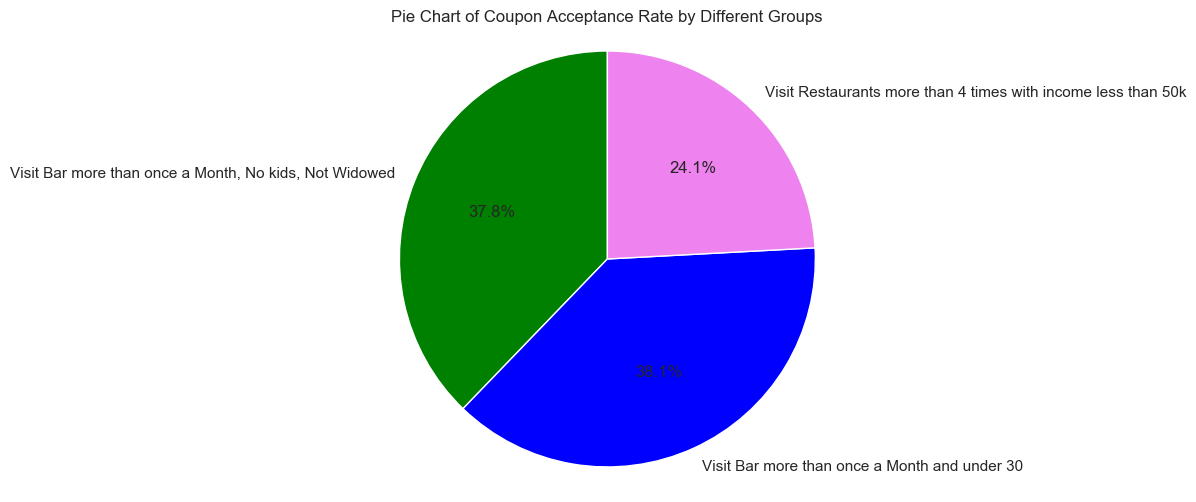

In [38]:
# pie chat showing the acceptance rate between drivers with above group
acceptance_rate_by_groups = [acceptance_rate_bar_more_than_once_nokids_notwidowed, acceptance_rate_bar_more_than_once_under_30, acceptance_rate_restaurant_income_lt_50]
label_acceptance_rate_by_groups = ['Visit Bar more than once a Month, No kids, Not Widowed', 'Visit Bar more than once a Month and under 30', \
                                   'Visit Restaurants more than 4 times with income less than 50k']

plt.figure(figsize=(10, 6))
plt.pie(acceptance_rate_by_groups, labels=label_acceptance_rate_by_groups, autopct='%1.1f%%', startangle=90, colors=['green', 'blue', 'violet'])

plt.title("Pie Chart of Coupon Acceptance Rate by Different Groups")
plt.axis('equal')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Here are my observations

###### Drivers who accepted bar coupon :

* The proportion of total observations that accepted the Bar coupon is 41.2%. This indicates a significant portion of the drivers accepted the coupon.

* Drivers who go to a bar less than 3 times have an acceptance rate of ~32.8%, and the drivers who visit more than 3 times have an acceptance rate of ~67.2%, so its clear that drivers who visit more frequently have higher chance of accepting the coupon.

* Drivers who go to a bar more than once a month and are above the age of 25 have the highest acceptance rate of 67.2%, indicating that regular bar visitors above age of 25 are more likely to accept the offer.

* Drivers who go to bar more than once a month have acceptance rate of 43.3% and drivers with passengers that were not a kid have acceptance rate of 30.7% and drivers with occupations other than farming, fishing, or forestry have 26% acceptance rate, so indicating frequent bar visitors and drivers with passengers and no kid have higher rate to accept the coupon.
    
###### Drivers who did not accept bar coupon :

* Drivers who go to a bar less than 3 times have less acceptance rate compared to drivers who visit more than times.
* Drivers below the age of 25 and who doesnt visit bar frequently have a lower acceptance rate of 32.8%, so this group appears to be less interested in accepting the coupon.
* Drivers who have no kids, are not widowed, and drivers that go to a bar more than once a month and are over the age of 30 have acceptance rates ranging between 37.8% to 38.1%, these groups demonstrate a moderate likelihood of accepting the coupon, while drivers that go to cheap restaurants more than 4 times a month with income is less than 50K have less acceptance rate of 24.1% compared to other groups.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### I am analyzing CarryAway data to explore the characteristics of passengers who accept the coupons.

1. Create a new DataFrame that contains just the carry away coupons

In [39]:
# create a dataframe for carryAway data
data_carryaway = data_new[data_new['coupon'] == 'Carry out & Take away']

2. What proportion of carry away coupons were accepted?

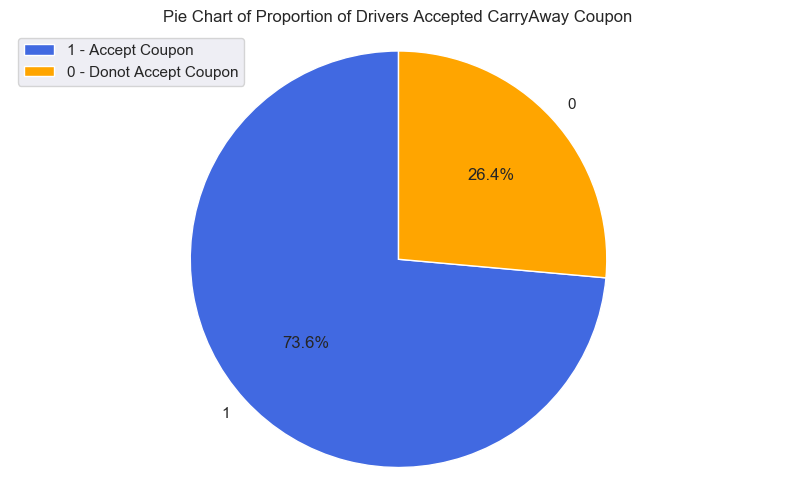

In [40]:
# pie chat showing the propotion of the customers that accepted the carry away coupons
carryaway_coupon_counts = data_carryaway['Y'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(carryaway_coupon_counts, labels=carryaway_coupon_counts.index, autopct='%1.1f%%', startangle=90, colors=['royalblue', 'orange'])

descriptions = {1: 'Accept Coupon', 0: 'Donot Accept Coupon'}
legend_labels = [f'{label} - {descriptions[label]}' for label in carryaway_coupon_counts.index]
plt.legend(legend_labels, loc='left')

plt.title("Pie Chart of Proportion of Drivers Accepted CarryAway Coupon")
plt.axis('equal')
plt.show()

3. Compare the acceptance rate based on number of times that they buy takeaway food.

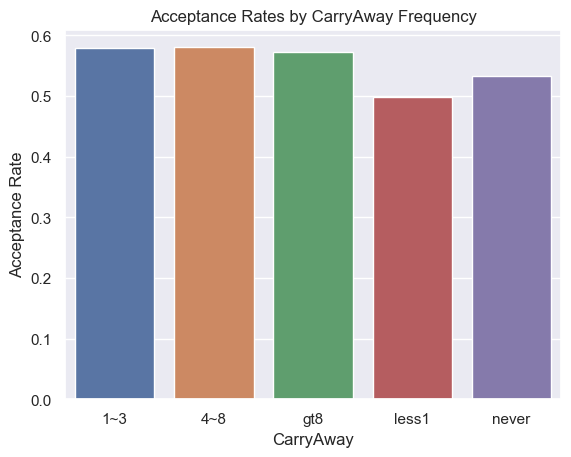

In [41]:
# Acceptance rate based on the frequency of carryaway food
carryaway_acceptance = data.groupby('CarryAway')['Y'].mean()
sns.barplot(x=carryaway_acceptance.index, y=carryaway_acceptance.values)

# Set the axis labels and plot title
plt.xlabel('CarryAway')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rates by CarryAway Frequency')

# Display the plot
plt.show()

3. Compare the acceptance rate by occupation.

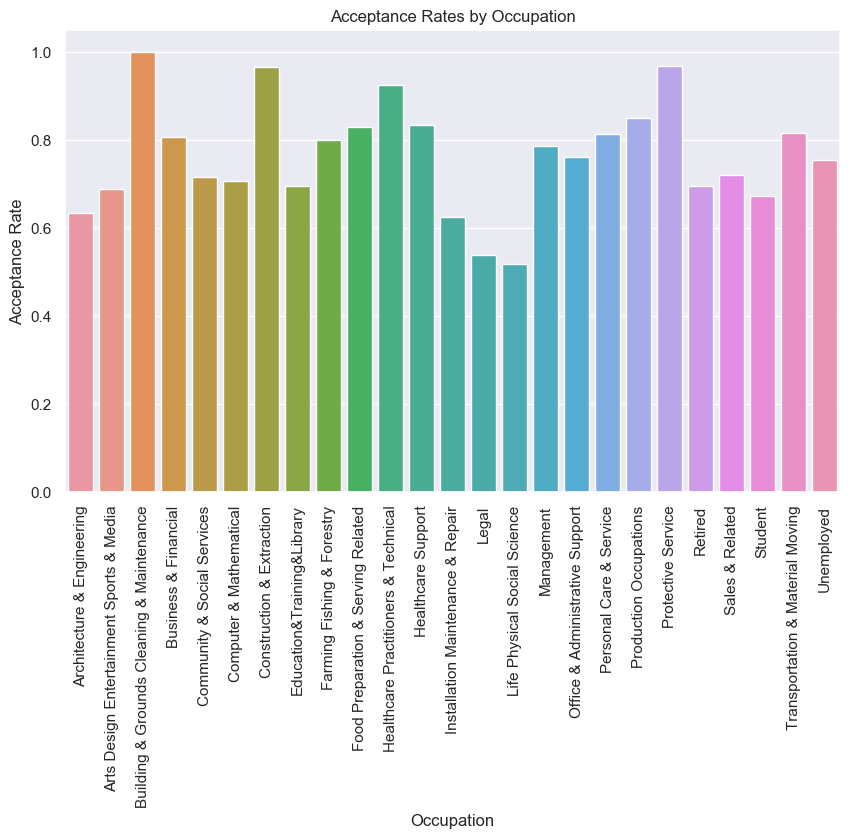

In [42]:
# data set groupby occupation and acceptance
occupation_acceptance = data_carryaway.groupby('occupation')['Y'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=occupation_acceptance.index, y=occupation_acceptance.values)
plt.xticks(rotation=90) 

# Set the axis labels and plot title
plt.xlabel('Occupation')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rates by Occupation')

# Display the plot
plt.show()

4. Compare the acceptance rate of coupon based on the time of the day.

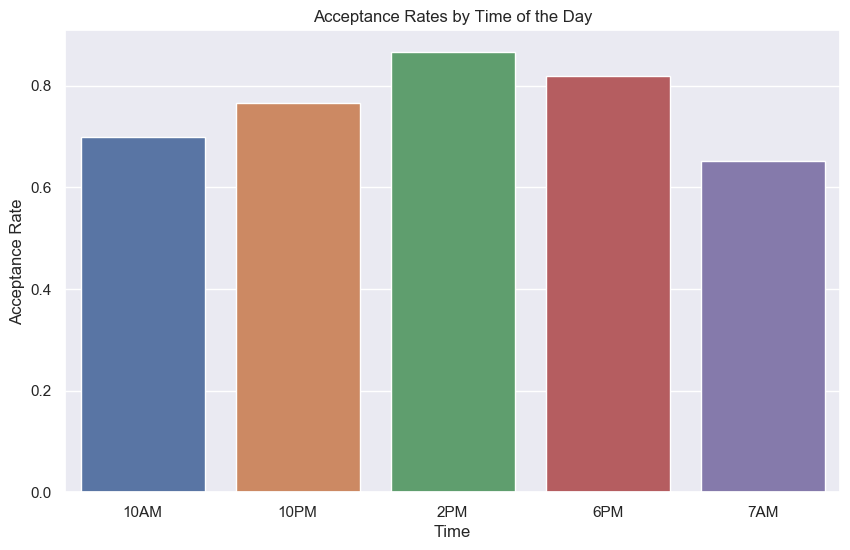

In [44]:
# data set groupby time and acceptance
occupation_acceptance = data_carryaway.groupby('time')['Y'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=occupation_acceptance.index, y=occupation_acceptance.values)

# Set the axis labels and plot title
plt.xlabel('Time')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rates by Time of the Day')

# Display the plot
plt.show()

5. Compare the acceptance rate by weather.

In [45]:
# get carry away data by weather
carry_away_sunny = data_carryaway.query("weather == 'Sunny'")
carry_away_rainy = data_carryaway.query("weather == 'Sunny'")
carry_away_snowy = data_carryaway.query("weather == 'Sunny'")

# Calculate the acceptance rate for each group
acceptance_rate_carry_away_sunny = carry_away_sunny['Y'].mean()
acceptance_rate_carry_away_rainy = carry_away_rainy['Y'].mean()
acceptance_rate_carry_away_snowy = carry_away_snowy['Y'].mean()

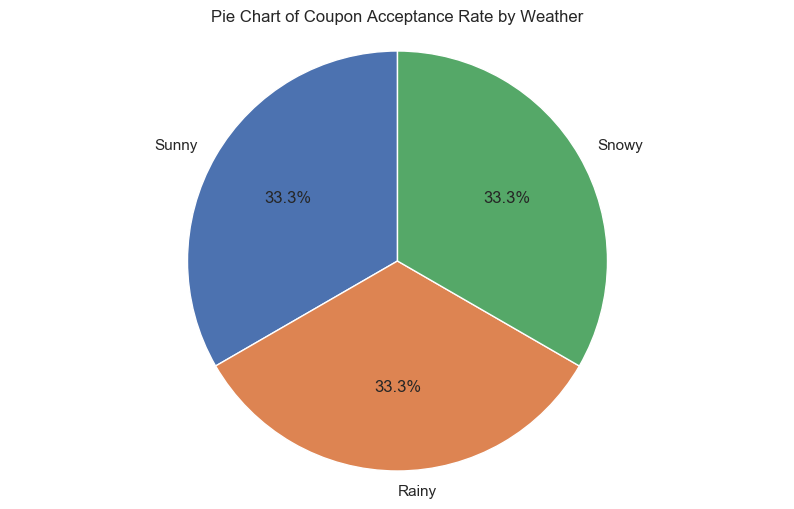

In [46]:
# pie chat showing the acceptance rate based on the weather
acceptance_rate_by_weather = [acceptance_rate_carry_away_sunny, acceptance_rate_carry_away_rainy, acceptance_rate_carry_away_snowy]
label_acceptance_rate_by_weather = ['Sunny', 'Rainy', \
                                   'Snowy']

plt.figure(figsize=(10, 6))
plt.pie(acceptance_rate_by_weather, labels=label_acceptance_rate_by_weather, autopct='%1.1f%%', startangle=90)

plt.title("Pie Chart of Coupon Acceptance Rate by Weather")
plt.axis('equal')
plt.show()

6. Compare the acceptance rate between drivers who go to CoffeHouse more than 4 times and others.

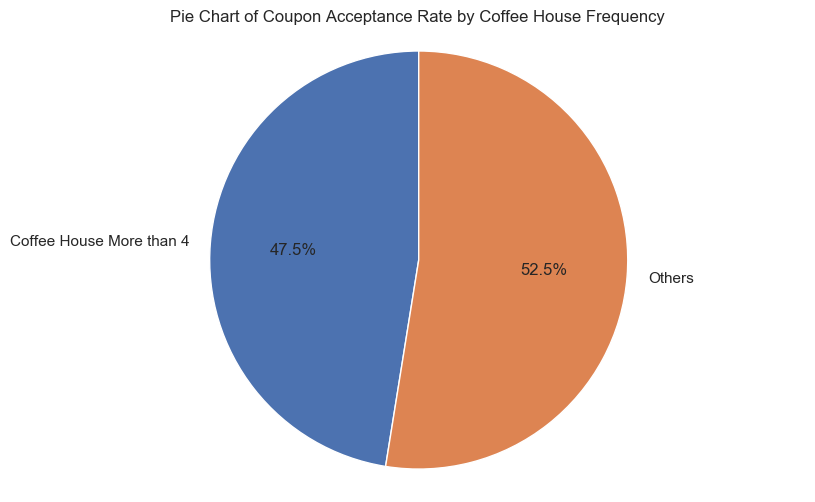

In [47]:
# Coupon Acceptance Rate between drivers who go to CoffeHouse more than 4 times and others. 
carry_away_coffeehouse_gt_4 = data_carryaway.query("CoffeeHouse in (['4~8', 'gt8'])")
carry_away_others = data_carryaway.drop(carry_away_coffeehouse_gt_4.index)

acceptance_rate_carry_away_coffeehouse_gt_4 = carry_away_coffeehouse_gt_4['Y'].mean()
acceptance_rate_carry_away_others = carry_away_others['Y'].mean()

# pie chat showing the acceptance rate between drivers with above group
acceptance_rate_by_coffehouse_freq = [acceptance_rate_carry_away_coffeehouse_gt_4, acceptance_rate_carry_away_others]
label_acceptance_rate_by_coffehouse_freq = ['Coffee House More than 4', 'Others']

plt.figure(figsize=(10, 6))
plt.pie(acceptance_rate_by_coffehouse_freq, labels=label_acceptance_rate_by_coffehouse_freq, autopct='%1.1f%%', startangle=90)

plt.title("Pie Chart of Coupon Acceptance Rate by Coffee House Frequency")
plt.axis('equal')
plt.show()

#### Here are the Observations based on the above analysis :

##### Carray Away coupon acceptance criteria :

* The proportion of drivers accepted Carry out & Take away coupons is 73.6%, this indicates significant portion of the drivers accepted the CarrayAway coupons.

* Most of the drivers irrespective of their CarrayAway frequency they accepted the coupons.

* Drivers with occupation in 'Building & Grounds Cleaning & Maintenance', 'Construction & Extraction', 'Protective Service' and 'Healthcare Practitioners & Technical' sectors tend to visit CarrayAway more than others.

* Based on the time, significant drivers carryAway at 2PM, 6PM and 10PM compared to morning hours.


##### Carray Away coupon non-acceptance criteria :

* Weather does not significantly affect the acceptance rate of Carry out & Take away

* Divers are less likely to CarrayAway in the morning hours

* Drivers who visit CoffeHouse more than 4 times tend to accept less CarrayAway coupons than others. 

## Next steps and recommendations

* **Time Based Promotions:** 
Leverage observed preferences for time based promotions, provide attractive discounts for the morning hours as they appeared to be accepted less compared to other time of the day.

* **Segmented Marketing:**
Use customer data to target specific groups with relevant coupons, target drivers who visit coffeHouse and cheap restuarants and offer them attractive discounts, also offer special incentives to frequent visitors and first-time buyers.

* **Bundle Deals:**
Consider offering bundle deals, such as "buy one, get one half-off" or "meal deals" where drivers can save money when they order multiple items.

* **Monitor and Analyze Results:**
Keep track of which coupons are performing well and which aren't. Use this data to refine your coupon strategy over time.

* **Feedback and Surveys:**
Collect feedback from drivers on their coupon preferences. This can help tailor coupon offerings to better match their preferences.


Overall, it is crucial to continue analyzing and monitoring the data, adjusting marketing strategies, along with offering attractive discounts and promoting them effectively and providing a seamless redemption process for drivers will help improve the acceptance rate.